## Projeto Machine Learning II

### *Equipe:*

- Priscila G. Petroni
- Vinicius Paccola
- Rudá Aranha
- Wesley Rodrigues

# Food Delivery Dataset

Entrega de comida é um serviço de entrega em que um restaurante, loja ou empresa independente de entrega de comida, entrega comida a um cliente. Um pedido é normalmente feito por meio do site ou aplicativo móvel de um restaurante ou mercearia, ou por meio de uma empresa de pedidos de comida. Os itens entregues podem incluir entradas, acompanhamentos, bebidas, sobremesas ou itens de mercearia e são normalmente entregues em caixas ou sacolas. O entregador normalmente dirige um carro, mas em cidades maiores, onde as casas e os restaurantes são mais próximos, eles podem usar bicicletas ou scooters motorizadas.

Fonte do Dataset selecionado: https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/data

| Coluna | Descrição |
|----------|----------|
| ID | Representa uma identificação única de uma entrada |
| Delivery_person_ID | Representa uma identificação única de um entregador |
| Delivery_person_Age | Representa a idade de um entregador |
| Delivery_person_Ratings | Representa as classificações médias dadas ao entregador (1 a 5) |
| Restaurant_latitude | Representa a latitude do restaurante |
| Restaurant_longitude | Representa a longitude do restaurante |
| Delivery_location_latitude | Representa a latitude do local de entrega |
| Delivery_location_longitude | Representa a longitude do local de entrega |
| Order_Date | Representa a data em que o pedido foi feito |
| Time_Orderd | Representa a hora em que o pedido foi feito |
| Time_Order_picked | Representa a hora em que o pedido foi retirado do restaurante |
| Weatherconditions | Representam as condições climáticas (Vento, Ensolarado, Nublado, Tempestuoso, Neblina, Tempestades de areia, etc.) |
| Road_traffic_density | Representa a densidade do tráfego rodoviário (Congestionamento, Alto, Médio e Baixo) |
| Vehicle_condition | Representa a condição do veículo. (Suave, boa ou média) |
| Type_of_order | Representa o tipo de pedido (Lanche, Refeição, Buffet, Bebidas, etc.) |
| Type_of_vehicle | Representa o tipo de veículo que se está usando (motocicleta, bicicleta, etc.) |
| multiple_deliveries | Representa o número de pedidos a serem entregues em uma tentativa |
| Festival | Representa se o dia é festivo ou não |
| City | Representa a cidade |
| Time_taken(min) | Representa o tempo que o entregador levou para entregar o pedido |

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├──
├── notebooks
│   └──
│   └── ...
├── modelos
│   └──
├── reports
│   └── ...
```

# Case

### **Otimização de Entregas no Food Delivery**

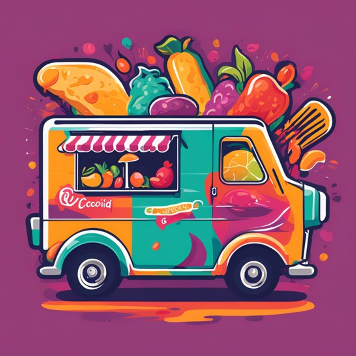

Uma empresa de entrega de alimentos, a ***QueroComida!***, enfrenta dificuldades em manter altos níveis de satisfação dos clientes devido a atrasos nas entregas. A equipe de operações identificou que fatores como idade dos entregadores, condições climáticas, densidade do tráfego e características das cidades estão impactando o tempo de entrega.

Além disso, a empresa quer explorar padrões nos pedidos para identificar segmentos de clientes e personalizar ofertas, como promoções para determinadas regiões, horários ou condições climáticas.

Desafios principais:

- **Previsão de tempo de entrega:** Identificar as principais variáveis que afetam o tempo de entrega e criar um modelo preditivo para estimá-lo.
- **Segmentação de entregas:** Descobrir padrões de clientes e regiões (clusterização) para otimizar rotas e personalizar estratégias de marketing.
- **Insights para eficiência:** Levantar recomendações baseadas nos dados para reduzir atrasos e melhorar a eficiência geral do serviço.

**Pergunta principal a ser respondida:** 

Como podemos usar os dados para prever atrasos e melhorar o tempo e a qualidade das entregas, maximizando a satisfação dos clientes?



In [165]:
# Importação das bibliotecas necessárias
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from sklearn.metrics import silhouette_score

warnings.simplefilter(action='ignore', category=FutureWarning)

bibliotecas = {
    "Pandas": pd,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
NumPy                |     1.26.4
Pandas               |      2.2.2
Scikit-Learn         |      1.5.1
Seaborn              |     0.13.2

Versão do Python: 3.11.5


# EDA

### Carregar e examinar os dados

In [166]:
# Carregar o dataset

train_data = pd.read_csv(r"../dados/train.csv")

In [167]:
train_data.shape

(45593, 20)

In [168]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [169]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,45593,45593,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,45593,1320,PUNERES01DEL01,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,45593,23,35,2262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Ratings,45593,29,4.8,7148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant_latitude,45593.0,NaN,NaN,NaN,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,NaN,NaN,NaN,70.231332,22.883647,-88.366217,73.17,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,NaN,NaN,NaN,17.465186,7.335122,0.01,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,NaN,NaN,NaN,70.845702,21.118812,0.01,73.28,76.002574,78.107044,88.563452
Order_Date,45593,44,15-03-2022,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Orderd,45593,177,NaN,1731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

_________

### **Gerando o ProfileReport do Dataset**

Para começar vamos gerar o ProfileReport, que oferece uma análise abrangente e detalhada do dataset, fornecendo insights valiosos sobre suas características e qualidade.

In [171]:
profile = ProfileReport(train_data)

profile.to_file("../reports/relatorio_inicial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5139: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5140: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(iy).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5141: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(ix).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5142: RuntimeWarning: invalid value encountered in cast
  iy2 = np.floor(iy).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5139: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:5140: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(iy).astype(int)
c:\Users\User\anaconda3\Lib\site-packages\matplotlib\axes\_axes.

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Limpeza e Pré-processamento dos Dados

Primeiramente, vamos excluir as colunas que já identificamos não serem necessárias para nosso estudo.

In [172]:
# vamos retirar as colunas que não nos interessam para o estudo

df_clean = train_data.drop(['ID', 
                            'Delivery_person_ID',
                            'Order_Date', 
                            'Time_Orderd',
                            'Time_Order_picked',
                            'Vehicle_condition',
                            'Festival'], axis=1)

In [173]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weatherconditions            45593 non-null  object 
 7   Road_traffic_density         45593 non-null  object 
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  multiple_deliveries          45593 non-null  object 
 11  City                         45593 non-null  object 
 12  Time_taken(min)              45593 non-null  object 
dtypes: float64(4), o

#### **Fazendo limpeza de valores nas colunas `Weatherconditions` e `Time_taken(min)`**

In [174]:
# Vamos arrumar as colunas WeatherConditions e Time_taken

# Tirando o (min) da Coluna Time_taken e transformando em inteira
df_clean['Time_taken(min)'] = df_clean['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
# Tirando o 'conditions' da coluna Weatherconditions
df_clean['Weatherconditions'] = df_clean['Weatherconditions'].apply(lambda x: x.split(' ')[1].strip())

In [175]:
print(df_clean['Time_taken(min)'].head())

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int64


In [176]:
print(df_clean['Weatherconditions'].head())

0         Sunny
1        Stormy
2    Sandstorms
3         Sunny
4        Cloudy
Name: Weatherconditions, dtype: object


#### **Verificando os valores zerados nas colunas `Restaurant_latitude` e `Restaurant_longitude`**

No contexto de nossa análise de entregas, é fundamental verificar se existem valores iguais a 0 (zero) nas colunas de latitude e longitude do restaurante, pois esses valores podem indicar dados faltantes ou incorretos, já que coordenadas geográficas de 0 (zero) normalmente representam pontos específicos no mundo (como o ponto de interseção entre o Equador e o Meridiano de Greenwich), que não são aplicáveis a locais reais de restaurantes.

Manter esses valores no dataset pode comprometer a precisão dos cálculos de distância entre o restaurante e o local de entrega, afetando diretamente as estimativas de tempo e a otimização das rotas. Portanto, a remoção dessas linhas com valores inválidos é essencial para garantir a qualidade dos dados e a confiabilidade das análises, assegurando que as decisões baseadas nesse conjunto de dados sejam precisas e eficazes.

In [177]:
# Contando os valores iguais a 0 e 0.0 na coluna 'Restaurant_latitude' e 'Restaurant_longitude'
zero_latitude = (df_clean['Restaurant_latitude'] == 0).sum()
zero_longitude = (df_clean['Restaurant_longitude'] == 0).sum()

# Exibindo o número de valores iguais a 0 ou 0.0
print(f"Número de valores iguais a 0.0 em 'Restaurant_latitude': {zero_latitude}")
print(f"Número de valores iguais a 0.0 em 'Restaurant_longitude': {zero_longitude}")


Número de valores iguais a 0.0 em 'Restaurant_latitude': 3640
Número de valores iguais a 0.0 em 'Restaurant_longitude': 3640


Após identificados os registros com latitude e longitude dos restaurantes iguais a zero, vamos dropar essas linhas para não gerarem impacto em nossas análises.

In [178]:
# Número de linhas antes de remover
print(f"Número de linhas antes: {df_clean.shape[0]}")

# Remover as linhas onde as coordenadas são 0.0
df_clean = df_clean[(df_clean['Restaurant_latitude'] != 0) & (df_clean['Restaurant_longitude'] != 0)]

# Número de linhas após a remoção
print(f"Número de linhas após: {df_clean.shape[0]}")

Número de linhas antes: 45593
Número de linhas após: 41953


In [179]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41953 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          41953 non-null  object 
 1   Delivery_person_Ratings      41953 non-null  object 
 2   Restaurant_latitude          41953 non-null  float64
 3   Restaurant_longitude         41953 non-null  float64
 4   Delivery_location_latitude   41953 non-null  float64
 5   Delivery_location_longitude  41953 non-null  float64
 6   Weatherconditions            41953 non-null  object 
 7   Road_traffic_density         41953 non-null  object 
 8   Type_of_order                41953 non-null  object 
 9   Type_of_vehicle              41953 non-null  object 
 10  multiple_deliveries          41953 non-null  object 
 11  City                         41953 non-null  object 
 12  Time_taken(min)              41953 non-null  int64  
dtypes: float64(4), int64(

#### **Criando uma nova coluna: `Distance`**

Vamos criar uma nova coluna chamada `Distance` que guardará o calculo em quilômetros da distancia do Restaurante até o local da entrega do pedido.

In [180]:
# Função para calcular a distância com arredondamento
def haversine(lat1, lon1, lat2, lon2):
    # Raio da Terra em quilômetros
    R = 6371.0
    
    # Converter de graus para radianos
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Diferenças de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distância
    distance = R * c
    return round(distance, 3)  # Arredonda para 3 casas decimais

# Aplicar a função para calcular a distância entre restaurante e local de entrega
df_clean['Distance'] = df_clean.apply(
    lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                         row['Delivery_location_latitude'], row['Delivery_location_longitude']),
    axis=1
)

# Verificando as primeiras linhas para garantir que a coluna 'Distance' foi criada corretamente
print(df_clean[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Distance']].head())

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Distance  
0                    75.912471     3.025  
1                    77.813237    20.184  
2                    77.688400     1.553  
3                    77.026494     7.790  
4                    80.289982     6.210  


In [181]:
# Exibindo os dados da coluna 'Distance'
print(df_clean['Distance'])

0         3.025
1        20.184
2         1.553
3         7.790
4         6.210
          ...  
45587    16.600
45588     1.490
45590     4.657
45591     6.232
45592    12.074
Name: Distance, Length: 41953, dtype: float64


Com as distancias já calculadas vamos dropar as colunas de latitude e longitude do restaurante e do local de entrega.

In [182]:
df_clean = df_clean.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1)

In [183]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41953 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41953 non-null  object 
 1   Delivery_person_Ratings  41953 non-null  object 
 2   Weatherconditions        41953 non-null  object 
 3   Road_traffic_density     41953 non-null  object 
 4   Type_of_order            41953 non-null  object 
 5   Type_of_vehicle          41953 non-null  object 
 6   multiple_deliveries      41953 non-null  object 
 7   City                     41953 non-null  object 
 8   Time_taken(min)          41953 non-null  int64  
 9   Distance                 41953 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


#### **Tratamento de valores *"NaN"* no dataset**

Identificamos no dataset que há muitas células preenchidas com a palavra "NaN" o que dificultará as próximas análises, por isso, faremos a substituição desse valores por valores nulos reais (np.nan), permitindo que o pandas e outras bibliotecas lidem corretamente com os valores ausentes. Isso é útil para garantir que os valores ausentes sejam tratados adequadamente durante análises ou modelos de machine learning.

In [184]:
# Transformar os valores NaN nas colunas em np.nan

df_clean['Delivery_person_Age'] = df_clean['Delivery_person_Age'].replace('NaN ', np.nan)
df_clean['Delivery_person_Ratings'] = df_clean['Delivery_person_Ratings'].replace('NaN ', np.nan)
df_clean['Road_traffic_density'] = df_clean['Road_traffic_density'].replace('NaN ', np.nan)
df_clean['City'] = df_clean['City'].replace('NaN ', np.nan)
df_clean['multiple_deliveries'] = df_clean['multiple_deliveries'].replace('NaN ', np.nan)
df_clean['Weatherconditions'] = df_clean['Weatherconditions'].replace('NaN', np.nan)

In [185]:
df_clean.isna().sum()

Delivery_person_Age        1719
Delivery_person_Ratings    1763
Weatherconditions           569
Road_traffic_density        555
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         905
City                       1114
Time_taken(min)               0
Distance                      0
dtype: int64

In [186]:
# Contando o número de linhas que possuem pelo menos um NaN
num_linhas_com_nan = df_clean.isna().any(axis=1).sum()

print(f"Número de linhas com pelo menos um NaN: {num_linhas_com_nan}")

Número de linhas com pelo menos um NaN: 3710


In [187]:
# Analisando os valores nulos da coluna Delivery_person_age

df_clean[df_clean['Delivery_person_Age'].isna()]

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Distance
42,NaN,NaN,Cloudy,Medium,Drinks,scooter,1,Metropolitian,33,12.237
74,NaN,NaN,NaN,NaN,Drinks,scooter,0,Metropolitian,19,6.211
120,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,16.660
140,NaN,NaN,Stormy,Low,Snack,scooter,0,NaN,19,4.597
179,NaN,NaN,Sandstorms,Medium,Drinks,motorcycle,0,Metropolitian,43,10.427
...,...,...,...,...,...,...,...,...,...,...
45508,NaN,NaN,Fog,Medium,Meal,motorcycle,1,Urban,36,10.756
45518,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,1.513
45519,NaN,NaN,NaN,NaN,Meal,electric_scooter,1,Urban,17,1.488
45526,NaN,NaN,Cloudy,Jam,Snack,scooter,0,Metropolitian,48,16.384


In [188]:
# Analisando os valores nulos da coluna Delivery_person_Ratings

df_clean[df_clean['Delivery_person_Ratings'].isna()]

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Distance
42,NaN,NaN,Cloudy,Medium,Drinks,scooter,1,Metropolitian,33,12.237
74,NaN,NaN,NaN,NaN,Drinks,scooter,0,Metropolitian,19,6.211
120,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,16.660
127,23,NaN,Sunny,Low,Drinks,motorcycle,0,Metropolitian,15,4.540
140,NaN,NaN,Stormy,Low,Snack,scooter,0,NaN,19,4.597
...,...,...,...,...,...,...,...,...,...,...
45508,NaN,NaN,Fog,Medium,Meal,motorcycle,1,Urban,36,10.756
45518,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,1.513
45519,NaN,NaN,NaN,NaN,Meal,electric_scooter,1,Urban,17,1.488
45526,NaN,NaN,Cloudy,Jam,Snack,scooter,0,Metropolitian,48,16.384


In [189]:
# Analisando os valores nulos da coluna Road_traffic_density

df_clean[df_clean['Road_traffic_density'].isna()]

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Distance
74,NaN,NaN,NaN,NaN,Drinks,scooter,0,Metropolitian,19,6.211
120,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,16.660
250,NaN,NaN,NaN,NaN,Buffet,motorcycle,1,Urban,43,16.853
348,NaN,NaN,NaN,NaN,Drinks,scooter,1,Metropolitian,26,20.183
425,NaN,NaN,NaN,NaN,Snack,scooter,1,Metropolitian,20,17744.205
...,...,...,...,...,...,...,...,...,...,...
45067,NaN,NaN,NaN,NaN,Drinks,bicycle,1,Metropolitian,39,16.608
45288,NaN,NaN,NaN,NaN,Buffet,electric_scooter,1,Metropolitian,27,6.059
45504,NaN,NaN,NaN,NaN,Meal,scooter,1,NaN,24,17340.703
45518,NaN,NaN,NaN,NaN,Snack,electric_scooter,0,Metropolitian,25,1.513


Identificamos que a maioria das colunas em certos registros estava com valores ausentes (NaN). Por isso, decidimos remover essas linhas, a fim de garantir que os resultados da análise não sejam comprometidos por dados incompletos ou irrelevantes.

In [190]:
print(df_clean.isna().any().any())  # Retorna True se houver qualquer NaN

True


In [191]:
df_clean = df_clean.dropna()

In [192]:
print(df_clean.isna().any().any())  # Retorna True se houver qualquer NaN
df_clean.isna().sum()

False


Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
City                       0
Time_taken(min)            0
Distance                   0
dtype: int64

In [193]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38243 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      38243 non-null  object 
 1   Delivery_person_Ratings  38243 non-null  object 
 2   Weatherconditions        38243 non-null  object 
 3   Road_traffic_density     38243 non-null  object 
 4   Type_of_order            38243 non-null  object 
 5   Type_of_vehicle          38243 non-null  object 
 6   multiple_deliveries      38243 non-null  object 
 7   City                     38243 non-null  object 
 8   Time_taken(min)          38243 non-null  int64  
 9   Distance                 38243 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.2+ MB


#### **Ajuste de Tipos de Dados para Consistência e Precisão na Análise**

O ajuste de tipos de dados é uma etapa essencial no pré-processamento de dados, especialmente quando se trabalha com variáveis numéricas que estão incorretamente classificadas como objetos (strings). No caso das colunas `Delivery_person_Age`, `Delivery_person_Ratings` e `multiple_deliveries`, a conversão para tipos numéricos apropriados (int ou float) é crucial para garantir que as operações matemáticas e estatísticas sejam executadas corretamente.

Manter essas colunas como object pode levar a erros de cálculo e distorções nos modelos de análise, uma vez que o pandas não poderá realizar operações matemáticas diretas em strings. Ao converter os valores para int ou float, asseguramos que os dados possam ser manipulados adequadamente, garantindo resultados precisos e a integridade das análises subsequentes.

In [194]:
# Convertendo 'Delivery_person_Age' para inteiro
df_clean['Delivery_person_Age'] = pd.to_numeric(df_clean['Delivery_person_Age'], errors='coerce')  # Coerce vai transformar qualquer valor não numérico em NaN
df_clean['Delivery_person_Age'].fillna(df_clean['Delivery_person_Age'].median(), inplace=True)  # Substituir NaN pela mediana (ou média)

# Convertendo 'Delivery_person_Ratings' para float
df_clean['Delivery_person_Ratings'] = pd.to_numeric(df_clean['Delivery_person_Ratings'], errors='coerce')  # Coerce vai transformar qualquer valor não numérico em NaN
df_clean['Delivery_person_Ratings'].fillna(df_clean['Delivery_person_Ratings'].median(), inplace=True)  # Substituir NaN pela mediana (ou média)

# Convertendo 'multiple_deliveries' para inteiro
df_clean['multiple_deliveries'] = pd.to_numeric(df_clean['multiple_deliveries'], errors='coerce')  # Coerce vai transformar qualquer valor não numérico em NaN
df_clean['multiple_deliveries'].fillna(0, inplace=True)  # Substituir NaN por 0 (ou média/mediana)
df_clean['multiple_deliveries'] = df_clean['multiple_deliveries'].astype(int)  # Garantir que seja inteiro

# Verificando os tipos de dados após a conversão
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38243 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      38243 non-null  int64  
 1   Delivery_person_Ratings  38243 non-null  float64
 2   Weatherconditions        38243 non-null  object 
 3   Road_traffic_density     38243 non-null  object 
 4   Type_of_order            38243 non-null  object 
 5   Type_of_vehicle          38243 non-null  object 
 6   multiple_deliveries      38243 non-null  int32  
 7   City                     38243 non-null  object 
 8   Time_taken(min)          38243 non-null  int64  
 9   Distance                 38243 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.1+ MB
None


In [195]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,38243.0,29.588291,5.762085,20.000,25.000,30.00,35.000,39.000
Delivery_person_Ratings,38243.0,4.632424,0.316479,2.500,4.500,4.70,4.900,5.000
multiple_deliveries,38243.0,0.746829,0.573019,0.000,0.000,1.00,1.000,3.000
Time_taken(min),38243.0,26.504197,9.368028,10.000,19.000,26.00,33.000,54.000
Distance,38243.0,28.285270,310.705652,1.465,4.658,9.22,13.682,6884.726


#### **Análise de Outliers da coluna `Distance`**

In [196]:
df_clean['Distance'].describe()

count    38243.000000
mean        28.285270
std        310.705652
min          1.465000
25%          4.658000
50%          9.220000
75%         13.682000
max       6884.726000
Name: Distance, dtype: float64

In [197]:
# Calcular Q1, Q3 e IQR
Q1 = df_clean['Distance'].quantile(0.25)
Q3 = df_clean['Distance'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df_clean[(df_clean['Distance'] < limite_inferior) | (df_clean['Distance'] > limite_superior)]
print("Outliers:")
print(outliers)

Outliers:
       Delivery_person_Age  Delivery_person_Ratings Weatherconditions  \
92                      34                      4.7        Sandstorms   
283                     32                      4.7        Sandstorms   
1091                    20                      4.7            Cloudy   
1783                    39                      4.5            Cloudy   
1976                    25                      4.0        Sandstorms   
...                    ...                      ...               ...   
43860                   32                      4.6        Sandstorms   
44051                   22                      5.0        Sandstorms   
44640                   23                      4.8             Sunny   
44933                   30                      4.9               Fog   
45182                   30                      4.0        Sandstorms   

      Road_traffic_density Type_of_order Type_of_vehicle  multiple_deliveries  \
92                    Low       

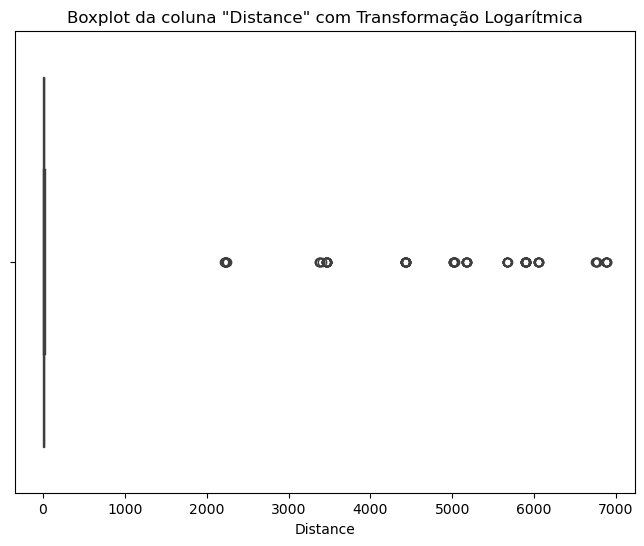

In [198]:
%matplotlib inline
# Aplicando logaritmo (com base 10) na coluna 'Distance' para reduzir a variação e conseguir visualizar os outliers no gráfico de bloxplot

# Boxplot da distância transformada
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Distance'])

# Título e exibição do gráfico
plt.title('Boxplot da coluna "Distance" com Transformação Logarítmica')
plt.show()


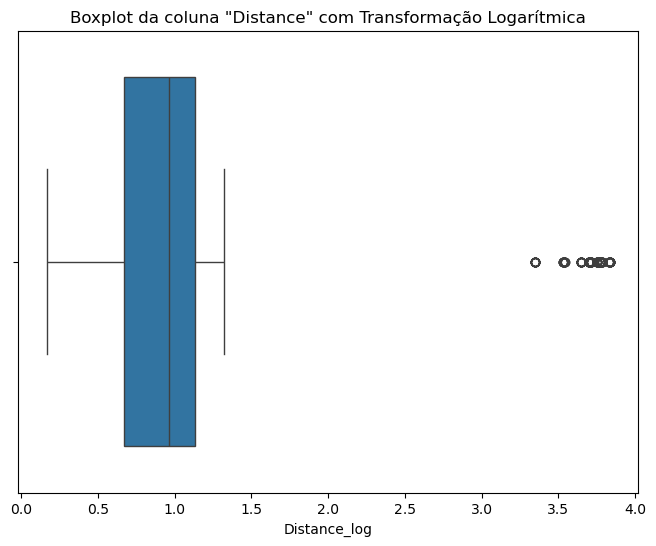

In [199]:
# Aplicando logaritmo (com base 10) na coluna 'Distance' para reduzir a variação e conseguir visualizar os outliers no gráfico de bloxplot
df_clean['Distance_log'] = np.log10(df_clean['Distance'])

# Boxplot da distância transformada
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Distance_log'])

# Título e exibição do gráfico
plt.title('Boxplot da coluna "Distance" com Transformação Logarítmica')
plt.show()


In [200]:
# como a coluna Distance_log não será usada, vamos excluí-la
df_clean.drop(columns=['Distance_log'], inplace=True)

In [201]:
df_sem_outliers = df_clean[(df_clean['Distance'] >= limite_inferior) & (df_clean['Distance'] <= limite_superior)]
print("Dataset sem outliers:")
print(df_sem_outliers)

Dataset sem outliers:
       Delivery_person_Age  Delivery_person_Ratings Weatherconditions  \
0                       37                      4.9             Sunny   
1                       34                      4.5            Stormy   
2                       23                      4.4        Sandstorms   
3                       38                      4.7             Sunny   
4                       32                      4.6            Cloudy   
...                    ...                      ...               ...   
45587                   35                      4.2             Windy   
45588                   30                      4.8             Windy   
45590                   30                      4.9            Cloudy   
45591                   20                      4.7            Cloudy   
45592                   23                      4.9               Fog   

      Road_traffic_density Type_of_order Type_of_vehicle  multiple_deliveries  \
0                   

In [202]:
df_sem_outliers['Distance'].describe().T

count    38097.000000
mean         9.749428
std          5.603498
min          1.465000
25%          4.658000
50%          9.220000
75%         13.681000
max         20.969000
Name: Distance, dtype: float64

In [203]:
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38097 entries, 0 to 45592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      38097 non-null  int64  
 1   Delivery_person_Ratings  38097 non-null  float64
 2   Weatherconditions        38097 non-null  object 
 3   Road_traffic_density     38097 non-null  object 
 4   Type_of_order            38097 non-null  object 
 5   Type_of_vehicle          38097 non-null  object 
 6   multiple_deliveries      38097 non-null  int32  
 7   City                     38097 non-null  object 
 8   Time_taken(min)          38097 non-null  int64  
 9   Distance                 38097 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.1+ MB


In [204]:
# Salvando o Dataset limpo sem os outliers

df_sem_outliers.to_csv("../dados/df_sem_outliers.csv", index=False)

In [205]:
profile = ProfileReport(df_sem_outliers)

profile.to_file("../reports/relatorio_final.html")

c:\Users\User\anaconda3\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### **Codificação de variáveis categóricas**

In [206]:
preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ['Delivery_person_Age', 'Delivery_person_Ratings', "multiple_deliveries", 'Time_taken(min)', 'Distance']),
        ("onehot", OneHotEncoder(), ["Weatherconditions", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "City"])
    ]
)

preprocessing.fit_transform(df_sem_outliers)

df_scaled = pd.DataFrame(
   preprocessing.fit_transform(df_sem_outliers),
   columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Delivery_person_Age,standard__Delivery_person_Ratings,standard__multiple_deliveries,standard__Time_taken(min),standard__Distance,onehot__Weatherconditions_Cloudy,onehot__Weatherconditions_Fog,onehot__Weatherconditions_Sandstorms,onehot__Weatherconditions_Stormy,onehot__Weatherconditions_Sunny,...,onehot__Type_of_order_Buffet,onehot__Type_of_order_Drinks,onehot__Type_of_order_Meal,onehot__Type_of_order_Snack,onehot__Type_of_vehicle_electric_scooter,onehot__Type_of_vehicle_motorcycle,onehot__Type_of_vehicle_scooter,onehot__City_Metropolitian,onehot__City_Semi-Urban,onehot__City_Urban
0,1.286028,0.845360,-1.303013,-0.267728,-1.200057,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.765472,-0.418463,0.441711,0.692739,1.862178,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-1.143230,-0.734419,0.441711,-0.054291,-1.462753,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.459546,0.213449,0.441711,-0.587884,-0.349684,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.418436,-0.102507,0.441711,0.372584,-0.631654,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


#### **Análise de correlação das variáveis**

In [207]:
# Calculando a matriz de correlação no dataset original
correlation_matrix = df_scaled.corr()

# Exibindo a correlação com 'Time_taken(min)' e organizando os resultados
correlation_with_target = correlation_matrix['standard__Time_taken(min)'].sort_values(ascending=False)

# Exibindo a correlação ordenada
print(correlation_with_target)

standard__Time_taken(min)                    1.000000
standard__multiple_deliveries                0.386849
onehot__Road_traffic_density_Jam             0.353973
standard__Distance                           0.322302
standard__Delivery_person_Age                0.299893
onehot__City_Metropolitian                   0.172646
onehot__Type_of_vehicle_motorcycle           0.163817
onehot__City_Semi-Urban                      0.149059
onehot__Weatherconditions_Fog                0.130709
onehot__Weatherconditions_Cloudy             0.124510
onehot__Road_traffic_density_High            0.028785
onehot__Road_traffic_density_Medium          0.022365
onehot__Type_of_order_Meal                   0.010498
onehot__Type_of_order_Snack                  0.000364
onehot__Type_of_order_Buffet                -0.003947
onehot__Type_of_order_Drinks                -0.006951
onehot__Weatherconditions_Windy             -0.009877
onehot__Weatherconditions_Sandstorms        -0.020444
onehot__Weatherconditions_St

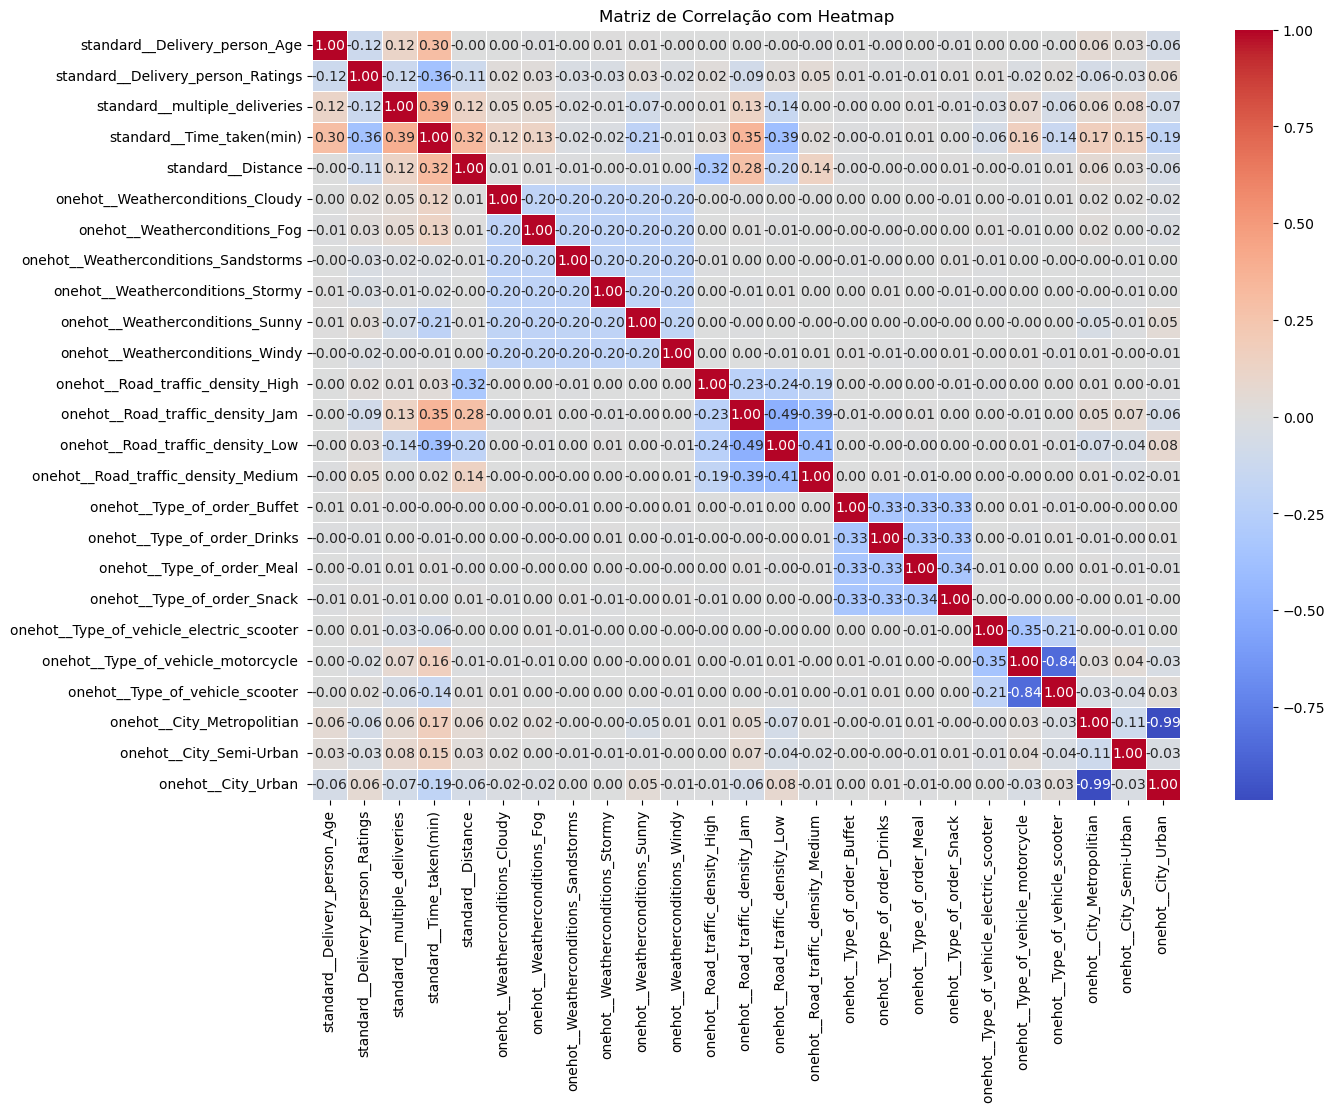

In [208]:
# Calculando a matriz de correlação no dataset original
correlation_matrix = df_scaled.corr()

# Configurando o tamanho da figura para o heatmap
plt.figure(figsize=(14, 10))

# Gerando o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Título e exibição do gráfico
plt.title('Matriz de Correlação com Heatmap')
plt.show()

analisando a matriz de correlação, vemos que várias colunas não possuem valores significativos com o possível target (Time_taken(min)).

assim, decidimos excluir as colunas Weatherconditions, type of order e city. Esta última, embora apresente uma certa correlação, também vai ser retirada por apresentar valores muito desbalanceados, com aproximadamente 80% de valores na categoria metropolitian.  

In [209]:
df_sem_outliers.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Distance
0,37,4.9,Sunny,High,Snack,motorcycle,0,Urban,24,3.025
1,34,4.5,Stormy,Jam,Snack,scooter,1,Metropolitian,33,20.184
2,23,4.4,Sandstorms,Low,Drinks,motorcycle,1,Urban,26,1.553
3,38,4.7,Sunny,Medium,Buffet,motorcycle,1,Metropolitian,21,7.790
4,32,4.6,Cloudy,High,Snack,scooter,1,Metropolitian,30,6.210


In [210]:
df_sem_outliers = df_sem_outliers.drop(columns=['Type_of_order', 'Weatherconditions', 'City'])

In [211]:
df_sem_outliers.head()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Time_taken(min),Distance
0,37,4.9,High,motorcycle,0,24,3.025
1,34,4.5,Jam,scooter,1,33,20.184
2,23,4.4,Low,motorcycle,1,26,1.553
3,38,4.7,Medium,motorcycle,1,21,7.790
4,32,4.6,High,scooter,1,30,6.210


Antes de realizar o escalonamento final do dataset, temos que tratar os outliers da coluna Distance. Faremos isso agora

#### **Análise de correlação das variáveis após exclusão dos Outliers da coluna `Distance`**

In [212]:
# Após a exclusão dos outliers, a correlação da variável Distance com o target subiu para 0.32
correlation = df_sem_outliers['Time_taken(min)'].corr(df_sem_outliers['Distance'])

# Exibindo a correlação
print(f"A correlação entre 'Time_taken(min)' e 'Distance' é: {correlation:.2f}")

A correlação entre 'Time_taken(min)' e 'Distance' é: 0.32


#### Escalonamento dos dados




In [213]:
preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ['Delivery_person_Age', 'Delivery_person_Ratings', "multiple_deliveries", 'Time_taken(min)', 'Distance']),
        ("onehot", OneHotEncoder(), ["Road_traffic_density", "Type_of_vehicle"])
    ]
)

preprocessing.fit_transform(df_sem_outliers)

df_scaled = pd.DataFrame(
   preprocessing.fit_transform(df_sem_outliers),
   columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Delivery_person_Age,standard__Delivery_person_Ratings,standard__multiple_deliveries,standard__Time_taken(min),standard__Distance,onehot__Road_traffic_density_High,onehot__Road_traffic_density_Jam,onehot__Road_traffic_density_Low,onehot__Road_traffic_density_Medium,onehot__Type_of_vehicle_electric_scooter,onehot__Type_of_vehicle_motorcycle,onehot__Type_of_vehicle_scooter
0,1.286028,0.845360,-1.303013,-0.267728,-1.200057,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.765472,-0.418463,0.441711,0.692739,1.862178,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.143230,-0.734419,0.441711,-0.054291,-1.462753,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.459546,0.213449,0.441711,-0.587884,-0.349684,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.418436,-0.102507,0.441711,0.372584,-0.631654,1.0,0.0,0.0,0.0,0.0,0.0,1.0


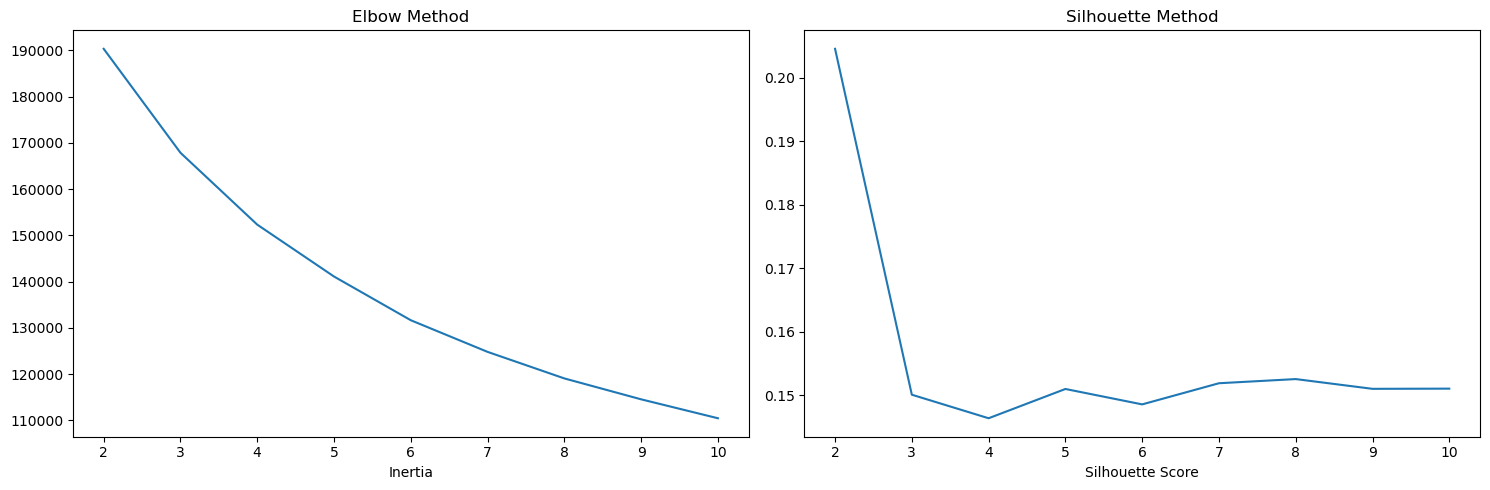

In [214]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

O número de clusters de acordo com os métodos do cotovelo e da silhueta é igual a 5.

# Aprendizagem Não-Supervisionada

#### K-Means

In [215]:
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=3, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df_sem_outliers)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'multiple_deliveries',
                                                   'Time_taken(min)',
                                                   'Distance']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Road_traffic_density',
                                                   'Type_of_vehicle'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [216]:
import joblib

joblib.dump(pipeline, "../modelos/pipeline_kmeans.pkl")

['../modelos/pipeline_kmeans.pkl']

In [217]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [218]:
pipeline["clustering"].labels_

array([3, 2, 3, ..., 0, 1, 1])

In [219]:
df_clustered = df_sem_outliers.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Type_of_vehicle,multiple_deliveries,Time_taken(min),Distance,cluster
0,37,4.9,High,motorcycle,0,24,3.025,3
1,34,4.5,Jam,scooter,1,33,20.184,2
2,23,4.4,Low,motorcycle,1,26,1.553,3
3,38,4.7,Medium,motorcycle,1,21,7.790,3
4,32,4.6,High,scooter,1,30,6.210,3


In [220]:
df_clustered['cluster'].unique()

array([3, 2, 1, 0, 4])

In [221]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38097 entries, 0 to 45592
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      38097 non-null  int64  
 1   Delivery_person_Ratings  38097 non-null  float64
 2   Road_traffic_density     38097 non-null  object 
 3   Type_of_vehicle          38097 non-null  object 
 4   multiple_deliveries      38097 non-null  int32  
 5   Time_taken(min)          38097 non-null  int64  
 6   Distance                 38097 non-null  float64
 7   cluster                  38097 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 3.3+ MB


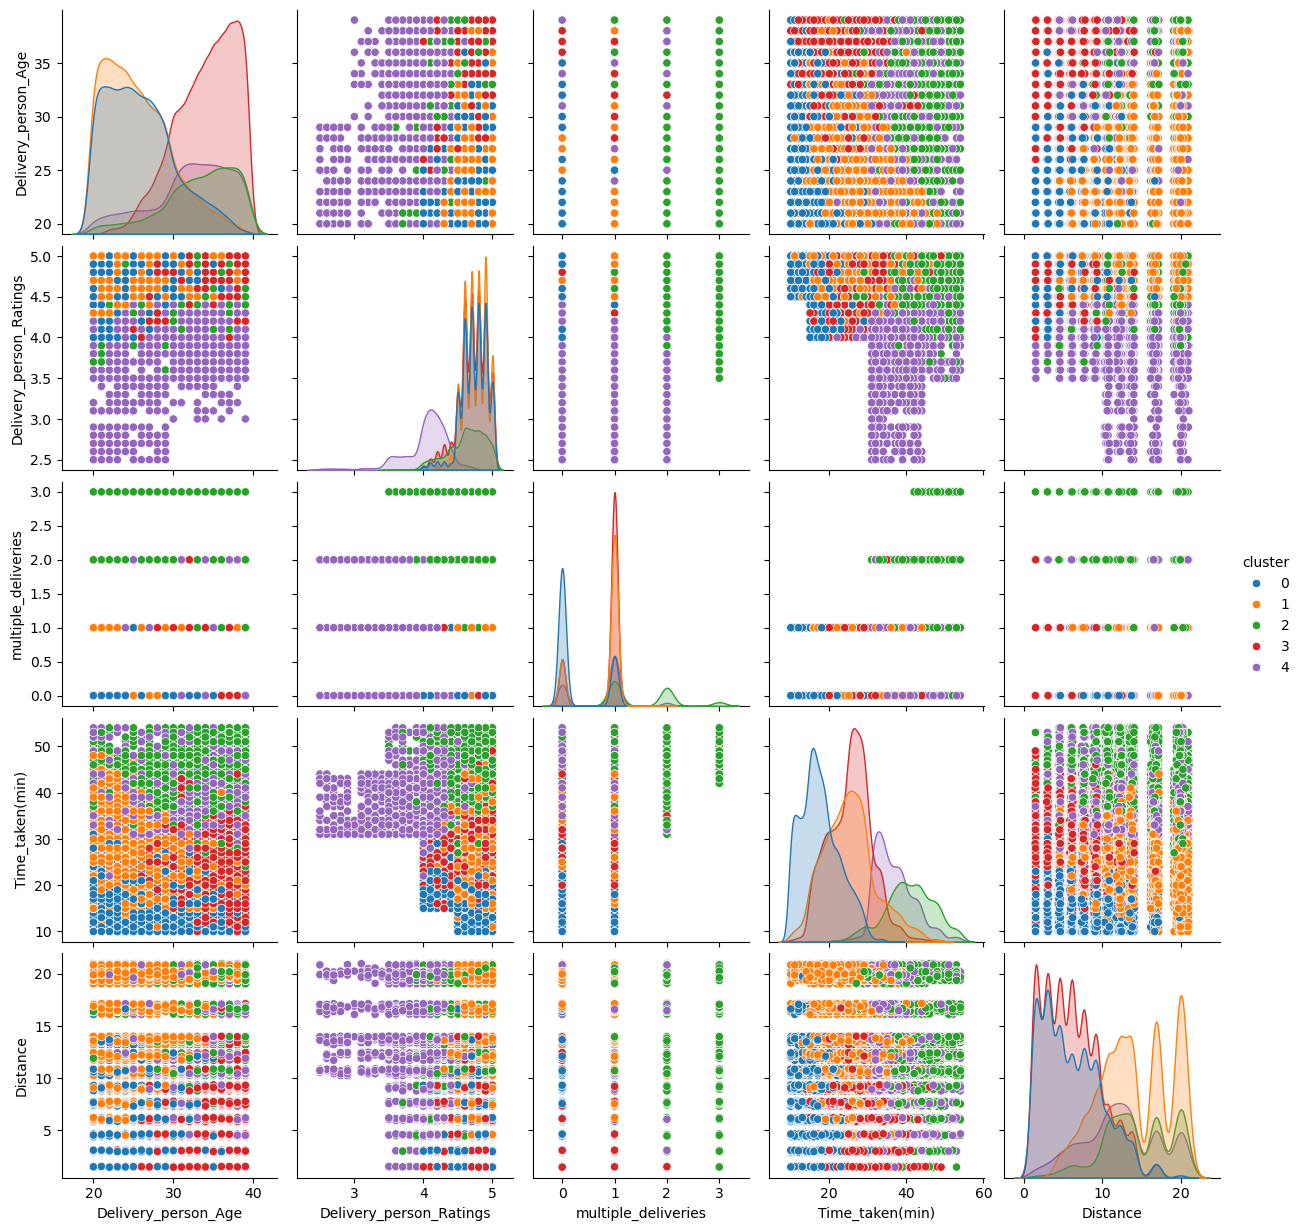

In [222]:
sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");
plt.show()

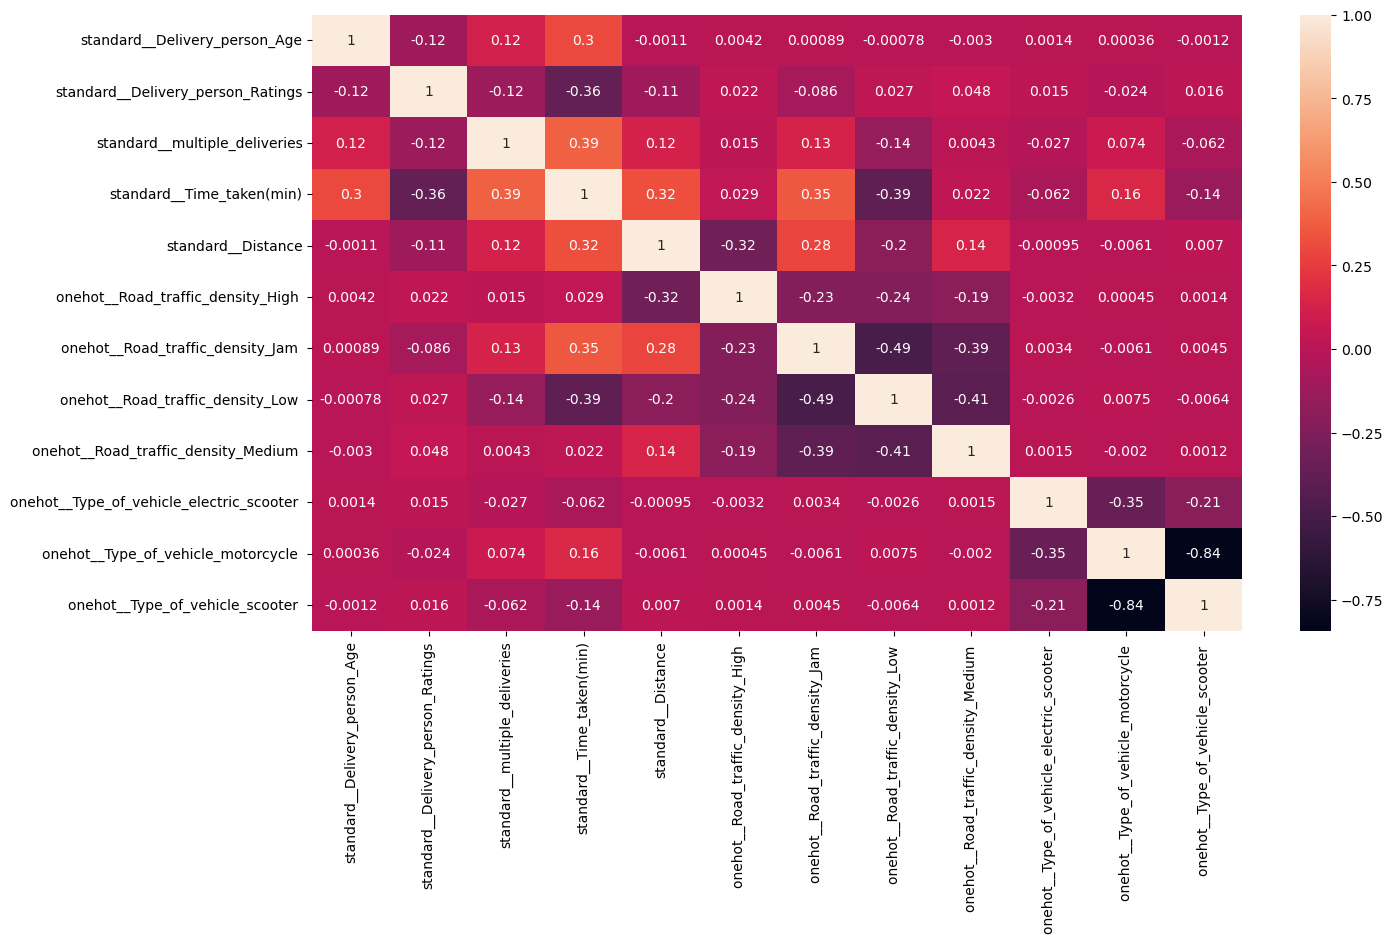

In [223]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

In [224]:
# Salvando o dataset atualizado

df_scaled.to_csv("../dados/df_scaled.csv", index=False)

In [225]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df_sem_outliers),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1,pca2
0,-1.082703,1.682769,0.092422
1,1.773354,-0.805918,-0.022314
2,-0.520694,0.426437,-0.428310
3,0.111451,1.185371,0.667732
4,0.300409,0.814958,0.245776


In [226]:
centroids = pipeline["clustering"].cluster_centers_

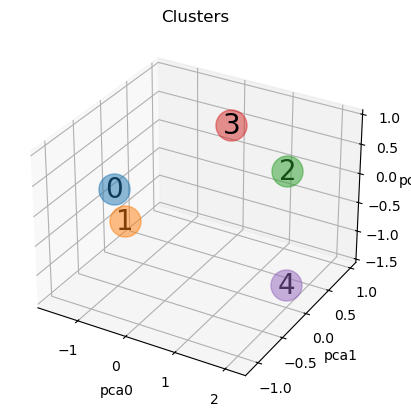

In [227]:

from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids,
)

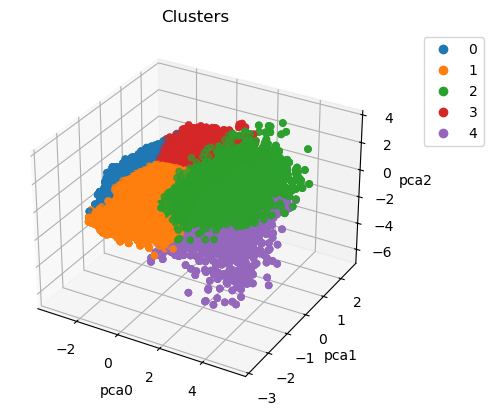

In [228]:
visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]
)

In [229]:
# Inicializando o escalonador
scaler = StandardScaler()

# Selecionando as colunas numéricas
numeric_cols = df_sem_outliers.select_dtypes(include=['float64', 'int64']).columns

# Aplicando o escalonamento utilizando .loc[] para evitar o SettingWithCopyWarning
df_sem_outliers.loc[:, numeric_cols] = scaler.fit_transform(df_sem_outliers[numeric_cols])

# Verificando as primeiras linhas do DataFrame escalonado
print(df_sem_outliers.head())

   Delivery_person_Age  Delivery_person_Ratings Road_traffic_density  \
0             1.286028                 0.845360                High    
1             0.765472                -0.418463                 Jam    
2            -1.143230                -0.734419                 Low    
3             1.459546                 0.213449              Medium    
4             0.418436                -0.102507                High    

  Type_of_vehicle  multiple_deliveries  Time_taken(min)  Distance  
0     motorcycle                     0        -0.267728 -1.200057  
1        scooter                     1         0.692739  1.862178  
2     motorcycle                     1        -0.054291 -1.462753  
3     motorcycle                     1        -0.587884 -0.349684  
4        scooter                     1         0.372584 -0.631654  


________

__________

# Aprendizagem Supervisionada

### SVM

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [231]:
def pipe_pre_process():
    
    # Para facilitar o carregamento e transformação dos dados
    
    dataset_cleaned = df_sem_outliers

    # Criando rótulo binário: "Entrega no prazo" (tempo de entrega <= 30 minutos como exemplo)
    #dataset_cleaned['On_time'] = (dataset_cleaned['Time_taken(min)'] <= 30).astype(int)
    dataset_cleaned['On_time'] = df_clustered['cluster']
    # Separando variáveis independentes (X) e dependente (y)
    X = dataset_cleaned.drop(columns=['Time_taken(min)', 'On_time'], axis=1)
    y = dataset_cleaned['On_time']

    # Dividindo o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
    ## Tratar dados numericos
    pipe_features_num = Pipeline([('input_num', SimpleImputer(strategy='median')),
                                  ('scaler', StandardScaler())])
    
    features_num = X_train.select_dtypes(include=np.number).columns.tolist()
    
    ## Tratar dados categóricos
    pipe_features_cat = Pipeline([('input_cat', SimpleImputer(strategy='constant', fill_value='unknown')),
                                  ('onehot', OneHotEncoder())])
    
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
    
    # Aplicando as transformações nos dados
    pre_processador = ColumnTransformer([('transf_num', pipe_features_num, features_num),
                                        ('transf_cat', pipe_features_cat, features_cat)])
    
    return X_train, X_test, y_train, y_test, pre_processador

In [232]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

In [233]:
# Preparando os dados e instanciando o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=42))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'multiple_deliveries',
                                                   'Distance']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Road_traffic_density',
                                                   'Type_of_vehicle'])])),
                ('svc', SVC(random_state=42))])

In [234]:
def metricas_classificacao(estimator):
    #=================
    print("\nMétricas da avaliação de treino:")
    
    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    
    #=================
    print("\nMétricas da avaliação de teste:")
    
    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    
    print(classification_report(y_test, y_pred_test))


Métricas da avaliação de treino:
[[6147  577    0  481   31]
 [ 382 7056  196    6   67]
 [   0  383 2477  283   41]
 [ 409   10  175 7926   65]
 [  42   69   18  129 3507]]


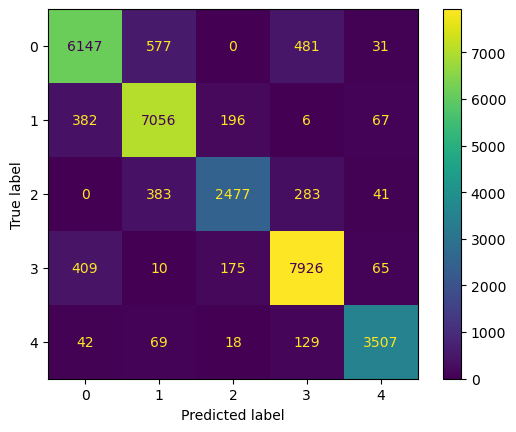

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7236
           1       0.87      0.92      0.89      7707
           2       0.86      0.78      0.82      3184
           3       0.90      0.92      0.91      8585
           4       0.95      0.93      0.94      3765

    accuracy                           0.89     30477
   macro avg       0.89      0.88      0.89     30477
weighted avg       0.89      0.89      0.89     30477


Métricas da avaliação de teste:
[[1536  156    0  112    6]
 [ 112 1749   62    2   16]
 [   1   80  599   65    5]
 [ 110    2   55 1955   16]
 [  13   21    8   38  901]]


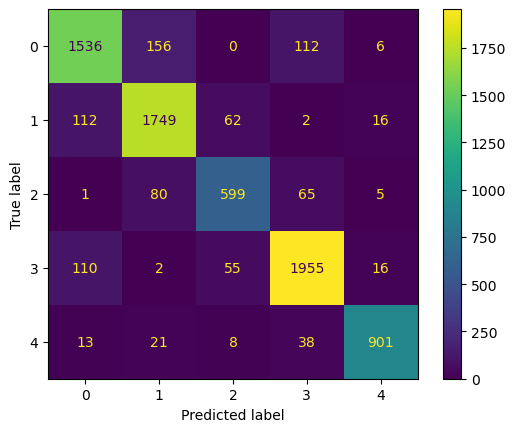

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1810
           1       0.87      0.90      0.89      1941
           2       0.83      0.80      0.81       750
           3       0.90      0.91      0.91      2138
           4       0.95      0.92      0.94       981

    accuracy                           0.88      7620
   macro avg       0.88      0.88      0.88      7620
weighted avg       0.88      0.88      0.88      7620



In [235]:
metricas_classificacao(pipe_svc)

In [236]:
import joblib

joblib.dump(pipe_svc, "../modelos/pipeline_svc.pkl")

['../modelos/pipeline_svc.pkl']